In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings("ignore")
%matplotlib inline
from PIL import Image

In [2]:
data = pd.read_csv("pulsar_stars.csv")
data.head()


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
print ("Number of rows    :",data.shape[0])
print ("Number of columns :",data.shape[1])

Number of rows    : 17898
Number of columns : 9


In [4]:


print ("data info  :",data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
data info  : None


In [5]:


print (data.isnull().sum())



 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


In [0]:
data = data.rename(columns={' Mean of the integrated profile':"mean_profile",
       ' Standard deviation of the integrated profile':"std_profile",
       ' Excess kurtosis of the integrated profile':"kurtosis_profile",
       ' Skewness of the integrated profile':"skewness_profile", 
        ' Mean of the DM-SNR curve':"mean_dmsnr_curve",
       ' Standard deviation of the DM-SNR curve':"std_dmsnr_curve",
       ' Excess kurtosis of the DM-SNR curve':"kurtosis_dmsnr_curve",
       ' Skewness of the DM-SNR curve':"skewness_dmsnr_curve",
       })


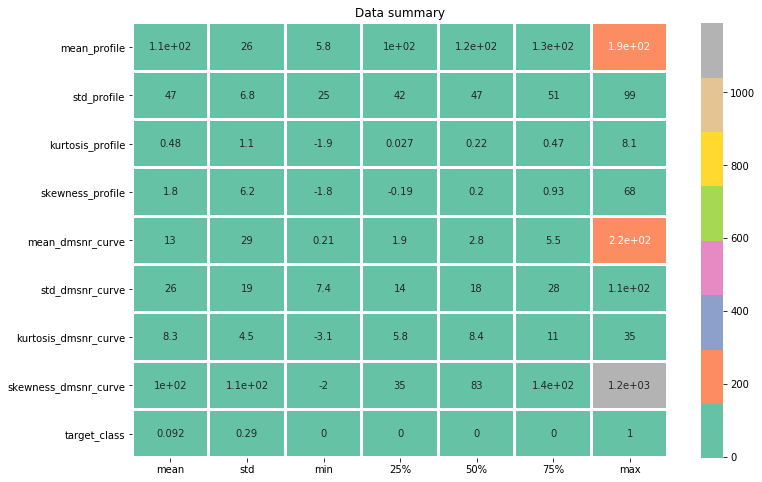

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(data.describe()[1:].transpose(),
            annot=True,linecolor="w",
            linewidth=2,cmap=sns.color_palette("Set2"))
plt.title("Data summary")
plt.show()

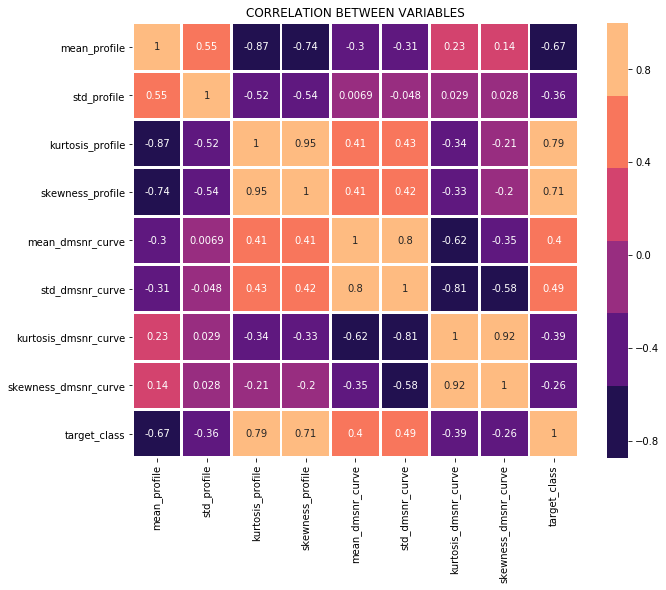

In [8]:
correlation = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("magma"),
            linewidth=2,edgecolor="k")
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()



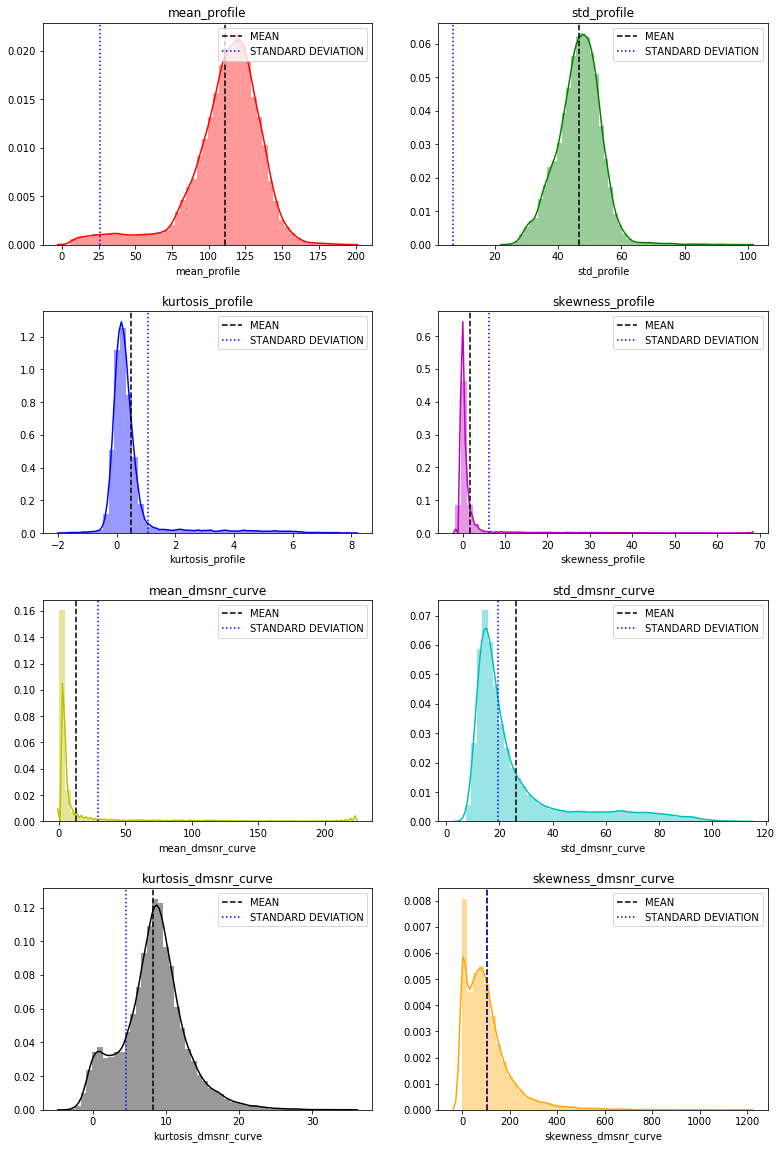

In [9]:
columns = ['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
           'mean_dmsnr_curve', 'std_dmsnr_curve', 'kurtosis_dmsnr_curve',
           'skewness_dmsnr_curve']
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange"] 

plt.figure(figsize=(13,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/4,j+1)
    sns.distplot(data[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(data[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(data[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")

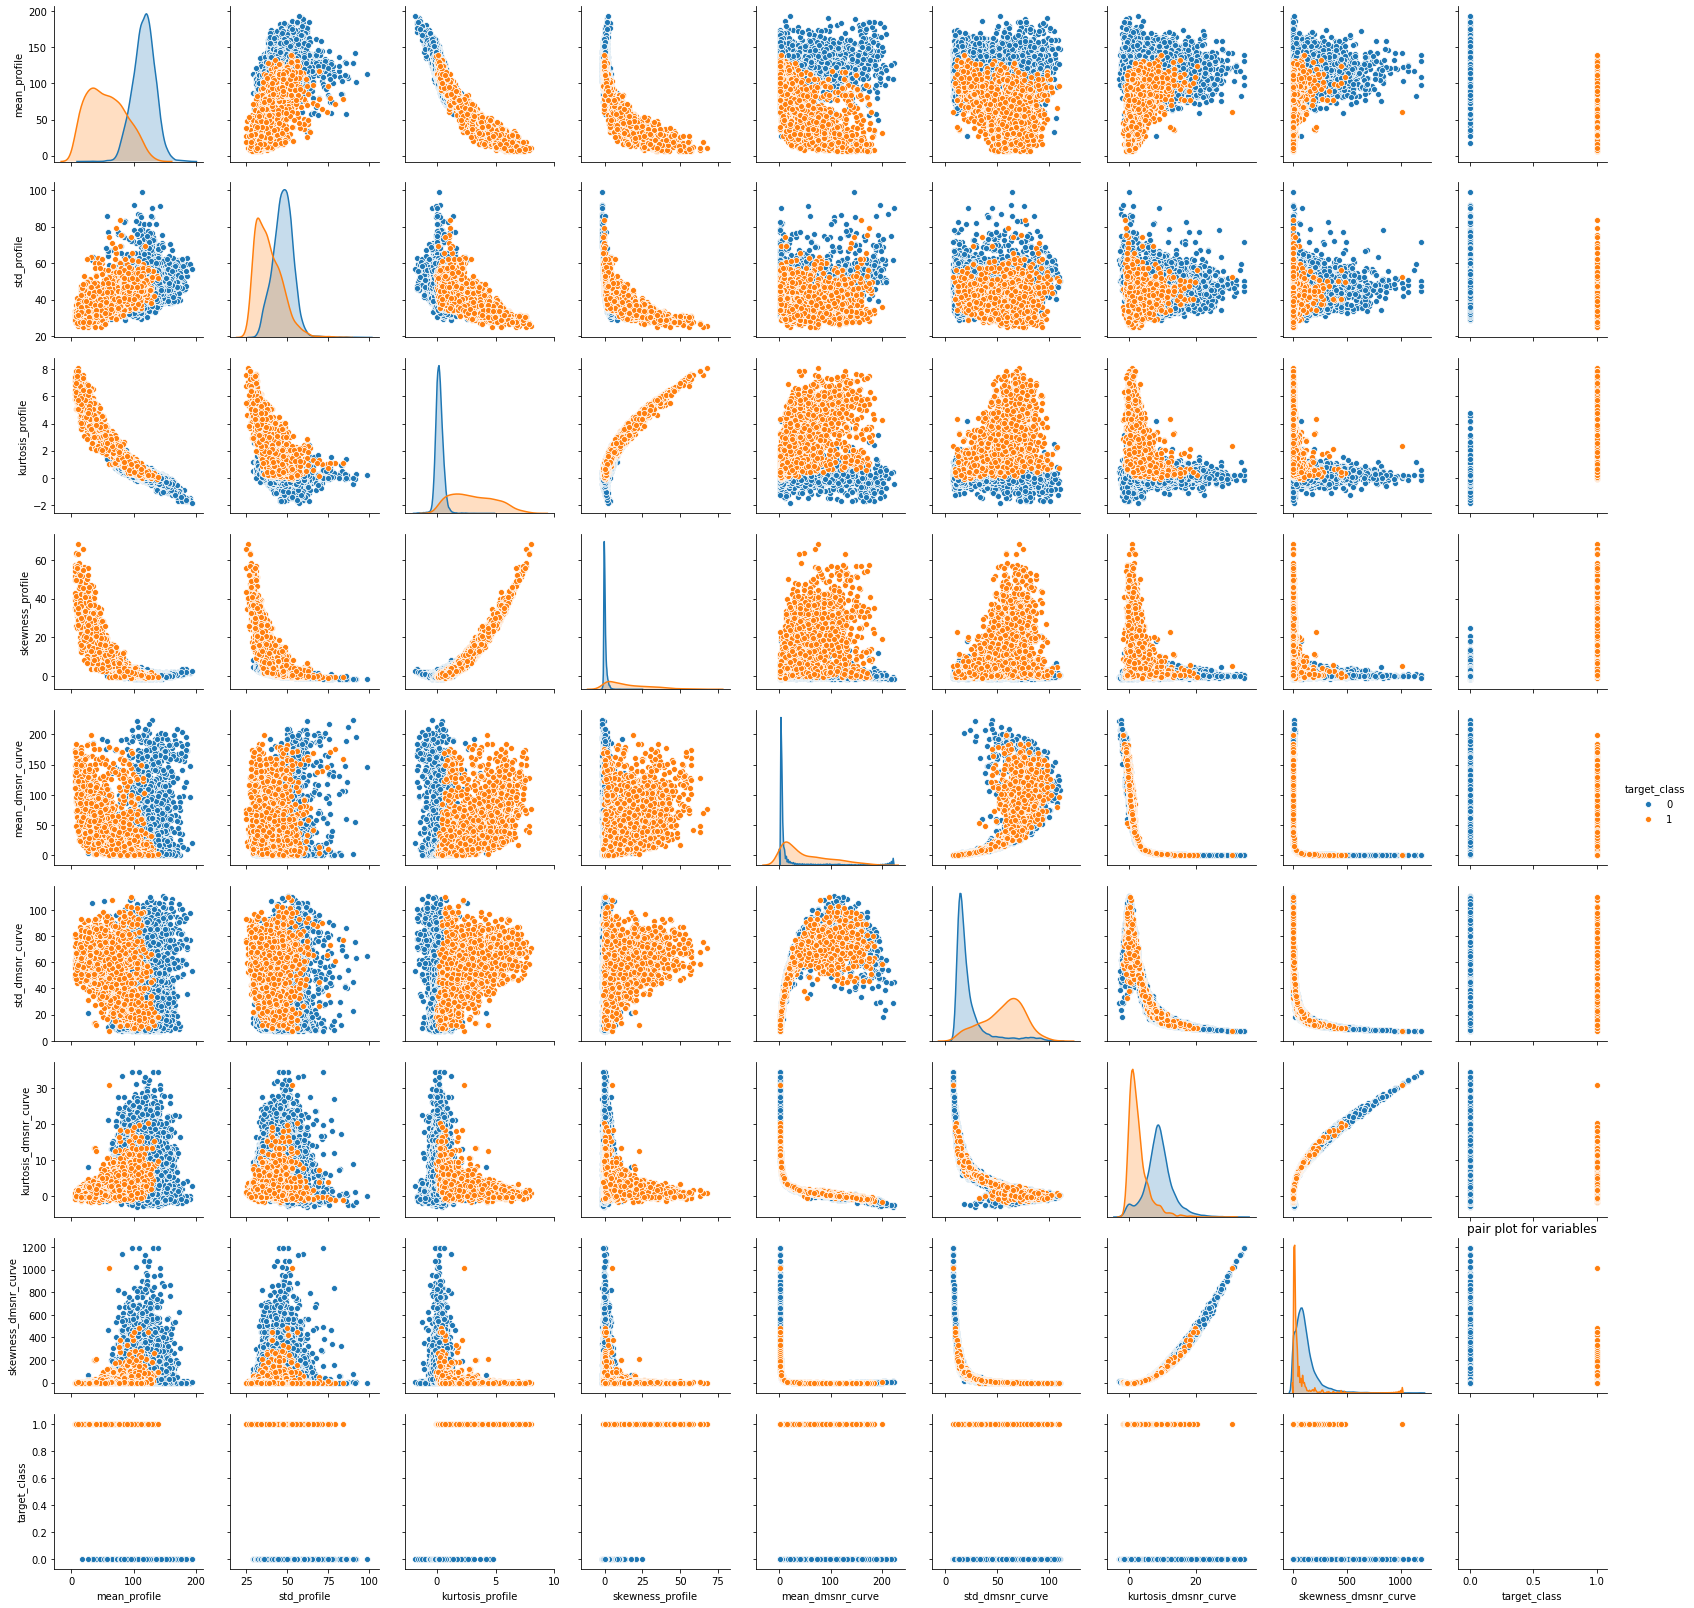

In [10]:
sns.pairplot(data,hue="target_class")
plt.title("pair plot for variables")
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(x,y,test_size=0.25,random_state=0)

In [0]:
x = data.drop("target_class",axis=1)

In [0]:
y = data["target_class"]

In [0]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

def model(algorithm,dtrain_x,dtrain_y,dtest_x,dtest_y,of_type):
    
    print ("*****************************************************************************************")
    print ("MODEL - OUTPUT")
    print ("*****************************************************************************************")
    algorithm.fit(dtrain_x,dtrain_y)
    predictions = algorithm.predict(dtest_x)
    
    print (algorithm)
    print ("\naccuracy_score :",accuracy_score(dtest_y,predictions))
    
    print ("\nclassification report :\n",(classification_report(dtest_y,predictions)))
        
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(dtest_y,predictions),annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=20)
    
    predicting_probabilites = algorithm.predict_proba(dtest_x)[:,1]
    fpr,tpr,thresholds = roc_curve(dtest_y,predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
    
    if  of_type == "feat":
        
        dataframe = pd.DataFrame(algorithm.feature_importances_,dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
    
    elif of_type == "coef" :
        
        dataframe = pd.DataFrame(algorithm.coef_.ravel(),dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
            
    elif of_type == "none" :
        return (algorithm)

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

accuracy_score : 0.9832402234636871

classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4115
           1       0.94      0.84      0.89       360

    accuracy                   

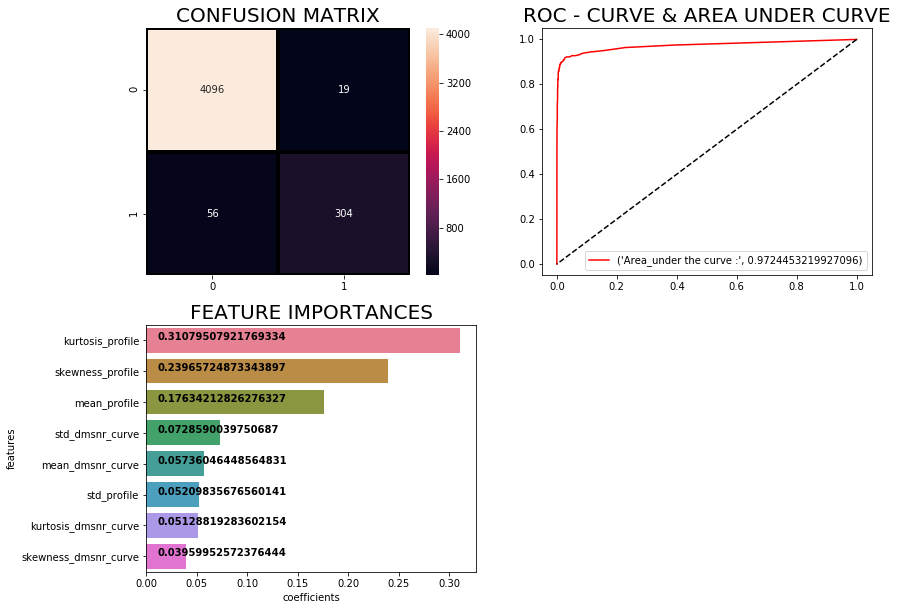

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
model(rf,train_X,train_Y,test_X,test_Y,"feat")

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

accuracy_score : 0.9810055865921787

classification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4115
           1       0.93      0.82      0.87       360

    accuracy                           0.98      4475
   macro avg       0.96      0.91      0.93      4475
weighted avg       0.98      0.98      0.98      4475



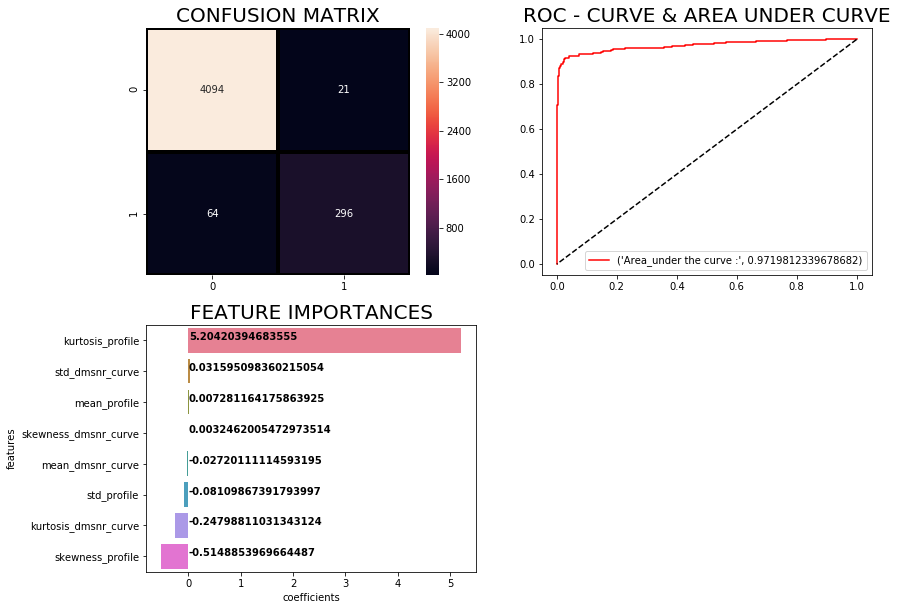

In [17]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
model(log,train_X,train_Y,test_X,test_Y,"coef")

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

accuracy_score : 0.9702793296089386

classification report :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4115
           1       0.82      0.81      0.81       360

    accuracy                           0.97      4475
   macro avg       0.90      0.90      0.90      4475
weighted avg       0.97      0.97      0.97

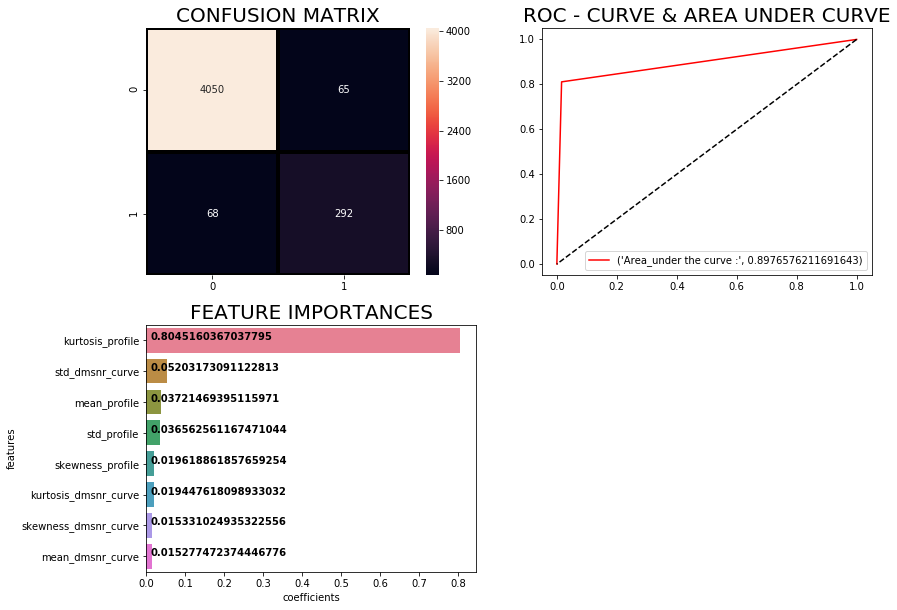

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model(dt,train_X,train_Y,test_X,test_Y,"feat")


*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')

accuracy_score : 0.9687150837988827

classification report :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4115
           1       0.80      0.82      0.81       360

    accuracy                           0.97      4475
   macro avg       0.89      0.90      0.90      4475
weighted avg       0.97      0.97      0.97      4475



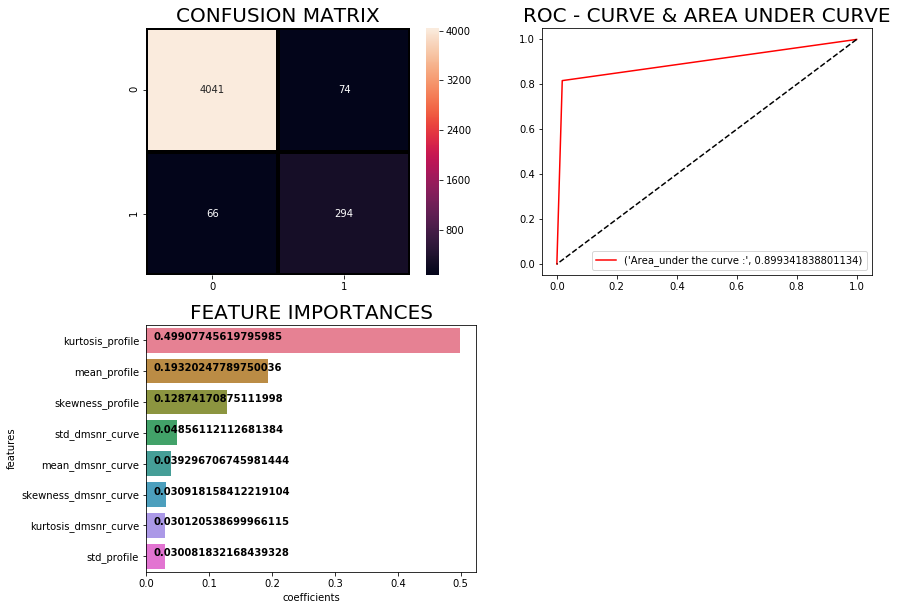

In [19]:


from sklearn.tree import ExtraTreeClassifier
etc = ExtraTreeClassifier()
model(etc,train_X,train_Y,test_X,test_Y,"feat")



*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
GaussianNB(priors=None, var_smoothing=1e-09)

accuracy_score : 0.9506145251396648

classification report :
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      4115
           1       0.65      0.86      0.74       360

    accuracy                           0.95      4475
   macro avg       0.82      0.91      0.85      4475
weighted avg       0.96      0.95      0.95      4475



GaussianNB(priors=None, var_smoothing=1e-09)

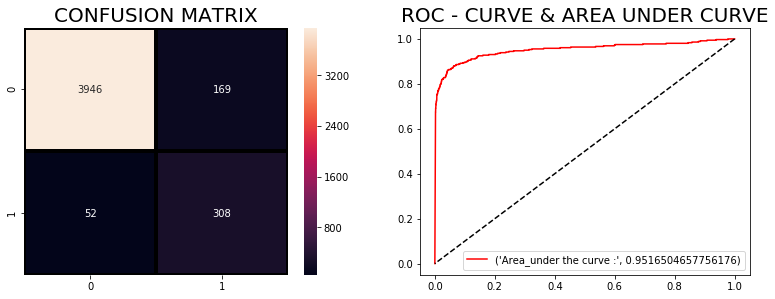

In [20]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model(nb,train_X,train_Y,test_X,test_Y,"none")

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

accuracy_score : 0.9760893854748603

classification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4115
           1       0.88      0.81      0.84       360

    accuracy                           0.98      4475
   macro avg       0.93      0.90      0.92      4475
weighted avg       0.98      0.98      0.98      4475



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

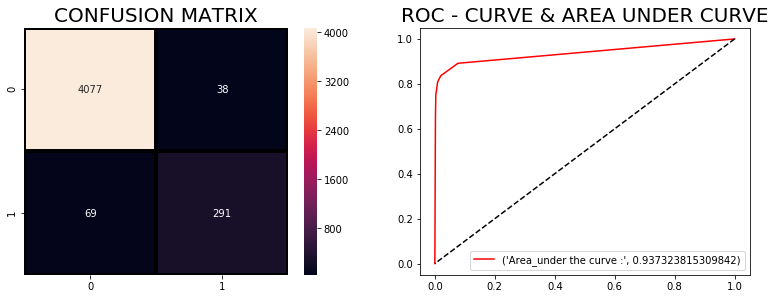

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model(knn,train_X,train_Y,test_X,test_Y,"none")